# 04 Exercise Solution - Linear Regression

Linear regression is a machine learning method for prediction. In essence, if we are given training samples $(x_0, y_0), \dots, (x_{n-1}, y_{n-1})$, then linear regression produces a line $L$ that best approximates the points. The line $L$ can then be used to predict the values of new data: If $x_{n}$ is a new data point, then the predicted value for $y_{n}$ is the hight of $L$ over the point $x_{n}$.

As an example, let the $x$-values represent height of individuals (in cm), and let the $y$-values represent the weight of the individuals (in kg). Then a pair $(180, 80)$ represents a person that is 180cm high, and weights 80kg. The task of linear regression is, given many observed individuals $(x_0, y_0), \dots, (x_{n-1}, y_{n-1})$, to predict the weight $y_{n}$ of a new individual by only knowing the persons hight $x_{n}$.

In this exercise sheet, we will implement linear regression on random data to get some practice with random number generators. We will give you everything you need to know, so don't worry if you don't already know linear regression.

## Exercise 1:  Importing NumPy

We start by importing the necessary packages.

In [1]:
# Import NumPy as np
import numpy as np

# Import the random module from NumPy
from numpy import random

## Exercise 2: Make a Random Number Generator

Create a random number generator with seed 101 and call this <b>rng</b>.

In [3]:
# Create a random number generator
rng = np.random.default_rng(101) # Give the seed 101 for repreducibility

## Exercise 3: Create Random Input Numbers

We will now create the $x$-values for training the linear regression. Make a NumPy array $x$ that contains 100 random integers between 0 and 10 (inclusive).

In [4]:
# Create random input numbers
x = rng.integers(0, 10, size=100, endpoint=True)

## Exercise 4: Create Random Output Numbers

We will now create the corresponding $y$-values. Make a NumPy array $y$ that contains 100 uniform random floats between 0 and 1.

In [5]:
# Create random output numbers
y = rng.random(100)

## Exercise 5: Means and Standard Deviations

Let us inspect the means and standard deviations of the NumPy arrays $x$ and $y$.

In [6]:
# Print the mean and standard deviation of X and y
print("The mean of x: ", np.around(np.mean(x), 3))
print("The mean of y: ", np.mean(y))
print("The standard deviation of x: ", np.std(x))
print("The standard deviation of y: ", np.std(y))

The mean of x:  4.81
The mean of y:  0.5028097596532392
The standard deviation of x:  2.985615514429144
The standard deviation of y:  0.2909796486285583


Since $x$ consists of random integers between 0 and 10, it should come as no surprise that the mean of $x$ is close to 5. Similarly, the mean of $y$ should be close to 0.5.

## Exercise 6: Plotting and Creating the Line

Before we move on, use <b>matplotlib</b> to plot the $x$-values and $y$-values.

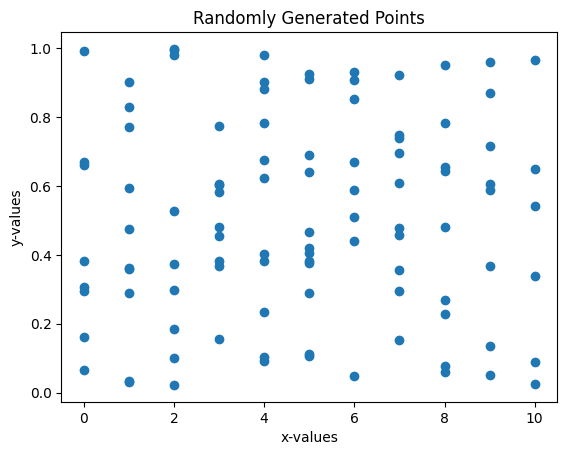

In [7]:
# Import matplotlib.pyplot with the alias plt
import matplotlib.pyplot as plt

# Plot the generated points with the plt.scatter command
plt.scatter(x, y)
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('Randomly Generated Points')

plt.show()

The idea is the we now have 100 pairs $(x_{0}, y_{0}), \dots, (x_{99}, y_{99})$. We see from the plot above that there is no line that goes through all of the points. However, there is a line that best approximates the points. In the next exercise, we will construct that line. 

### Constructing the Line

We are looking for a line $L$ that best fits the points we have created. A line $L$ has the form 
$$L = ax + b.$$
Hence we need to find the coefficients $a$ and $b$ to determine the line. The coefficients $a$ and $b$ for the line that best fits the points are given explicitly by the expression in the next cell.

In [7]:
# Run this cell to create the coefficients a and b
a = (100*np.sum(x * y) - np.sum(x)*np.sum(y))/(100*np.sum(x * x) - np.sum(x)**2)
b = (np.sum(y)*np.sum(x ** 2) - np.sum(x)*np.sum(x * y))/(100*np.sum(x * x) - np.sum(x)**2)

print("The coefficient a: ", a)
print("The coefficient b: ", b)

The coefficient a:  0.003932239313477348
The coefficient b:  0.48389568855541343


You don't need the understand the expression for $a$ and $b$; this is something one learns about in a statistics class. However, notice that to create $a$ and $b$ we only use the method <b>np.sum()</b> and exponentiations.

The value $a$ represent the slope of the line $L$, while $b$ represents the $y$-axis intercept. Since the data is randomly generated in the way we have done, the $y$-intercept $b$ will be roughly $0.5$ and the slope $a$ will be close to zero. This corresponds to a horizontal line with height $0.5$.

## Exercise 7: Predict a Value at a New Point

Now that we have the line $L$, we can predict the value of a new point. First create a new value $x_{new}$. Then use for formula $L = ax + b$ to find the predicted $y$-value.

In [8]:
# Create a new variable called x_new between 0 and 10 (you can choose the value)
x_new = 5

# Predict the corresponding y_new value
y_new = a * x_new + b
print("The predicted value: ", y_new)

The predicted value:  0.5035568851228002


Whatever value you choose for $x_{new}$, the corresponding predicted value in our example should be close to $0.5$. This feature happens because our data is randomly generated.

## Moral of the Story

As you might have suspected by now, linear regression behaves a bit boringly when using random data. We essentially predict roughly a value of $0.5$ independently of what the input $x_{new}$ is. This is because our data are uniformly distributed, so each point is equally likely to be chosen. For real data, this is almost never the case.

Even though we learned about linear regression for random data, the exact same procedure work for real data as well. Sometimes random data is used as a "reality check" to see if our linear model makes sense and that we have not written something wrong.